# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdtr
import datetime
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

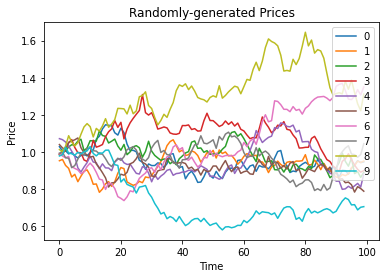

In [ ]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

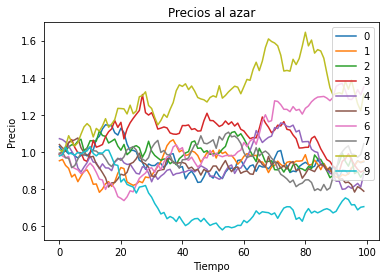

In [ ]:
retornos = pd.DataFrame(np.random.normal(1.0, 0.05, (150, 6)))
precios = returns.cumprod()
precios.plot()
plt.title('Precios al azar')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(loc=1);

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [ ]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
s_ej = pd.Series([3.0, 23, 21.5, 2.56, np.nan, 1.4])

Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [ ]:
print(s.name)

None


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
print(s_ej.name)

None


This name can be directly modified with no repercussions.

In [ ]:
s.name = "Toy Series"
print(s.name)

Toy Series


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
s_ej.name = "High Scores"
print(s_ej.name)

High Scores


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [ ]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
print(s_ej.index)

RangeIndex(start=0, stop=6, step=1)


Pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [ ]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
indice = pd.date_range("2021-03-19", periods=len(s_ej), freq="H") #Utiliza la hora en vez del día
print(indice)

DatetimeIndex(['2021-03-19 00:00:00', '2021-03-19 01:00:00',
               '2021-03-19 02:00:00', '2021-03-19 03:00:00',
               '2021-03-19 04:00:00', '2021-03-19 05:00:00'],
              dtype='datetime64[ns]', freq='H')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [ ]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
s_ej.index = indice
print(s_ej.index)

DatetimeIndex(['2021-03-19 00:00:00', '2021-03-19 01:00:00',
               '2021-03-19 02:00:00', '2021-03-19 03:00:00',
               '2021-03-19 04:00:00', '2021-03-19 05:00:00'],
              dtype='datetime64[ns]', freq='H')


#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [ ]:
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
print("Tercer elemento de la serie: ", s_ej.iloc[2])
print("Quinto elemento de la serie: ", s_ej.iloc[4])

Tercer elemento de la serie:  21.5
Quinto elemento de la serie:  nan


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [ ]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
s_ej.iloc[:4]

2021-03-19 00:00:00     3.00
2021-03-19 01:00:00    23.00
2021-03-19 02:00:00    21.50
2021-03-19 03:00:00     2.56
Freq: H, Name: High Scores, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [ ]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
inicio = 0
fin = len(s_ej) - 1
pasos = 2
s_ej.iloc[inicio:fin:pasos]

2021-03-19 00:00:00     3.0
2021-03-19 02:00:00    21.5
2021-03-19 04:00:00     NaN
Freq: 2H, Name: High Scores, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [ ]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
s_ej.iloc[::-1]

2021-03-19 05:00:00     1.40
2021-03-19 04:00:00      NaN
2021-03-19 03:00:00     2.56
2021-03-19 02:00:00    21.50
2021-03-19 01:00:00    23.00
2021-03-19 00:00:00     3.00
Freq: -1H, Name: High Scores, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [ ]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
s_ej.iloc[-1:-5:-3]

2021-03-19 05:00:00     1.4
2021-03-19 02:00:00    21.5
Freq: -3H, Name: High Scores, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [ ]:
s.loc['2016-01-01']

1.0

Or even for a range of dates!

In [ ]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
s_ej.loc['2021-03-19 01:00:00']

23.0

In [ ]:
s_ej.loc['2021-03-19 01:00:00':'2021-03-19 04:00:00']

2021-03-19 01:00:00    23.00
2021-03-19 02:00:00    21.50
2021-03-19 03:00:00     2.56
2021-03-19 04:00:00      NaN
Freq: H, Name: High Scores, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [ ]:
print(s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
print(s_ej > 16)

2021-03-19 00:00:00    False
2021-03-19 01:00:00     True
2021-03-19 02:00:00     True
2021-03-19 03:00:00    False
2021-03-19 04:00:00    False
2021-03-19 05:00:00    False
Freq: H, Name: High Scores, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [ ]:
print(s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
print(s_ej.loc[s_ej >10])

2021-03-19 01:00:00    23.0
2021-03-19 02:00:00    21.5
Freq: H, Name: High Scores, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [ ]:
print(s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
print(s_ej.loc[(s_ej > 2) & (s_ej < 10)])

2021-03-19 00:00:00    3.00
2021-03-19 03:00:00    2.56
Freq: 3H, Name: High Scores, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [ ]:
symbol = "CMG"
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2016,1,1)
prices = pdtr.get_data_yahoo(symbol, start=start, end=end)
prices = prices.tz_localize('UTC')

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [ ]:
print("\n", type(prices))
prices.head(5) 


 <class 'pandas.core.frame.DataFrame'>


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03 00:00:00+00:00,350.489990,340.000000,343.700012,341.269989,728100,341.269989
2012-01-04 00:00:00+00:00,349.980011,345.010010,346.000000,348.750000,743100,348.750000
2012-01-05 00:00:00+00:00,351.980011,342.570007,346.880005,350.480011,672300,350.480011
2012-01-06 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700,348.950012
2012-01-09 00:00:00+00:00,349.489990,336.290009,349.000000,339.739990,748600,339.739990


As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [ ]:
#print('Old name: ', prices.name) Results in an error
prices.name = symbol
print('New name: ', prices.name)

New name:  CMG


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [ ]:
print(prices.index)

DatetimeIndex(['2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               '2012-01-11 00:00:00+00:00', '2012-01-12 00:00:00+00:00',
               '2012-01-13 00:00:00+00:00', '2012-01-17 00:00:00+00:00',
               ...
               '2015-12-17 00:00:00+00:00', '2015-12-18 00:00:00+00:00',
               '2015-12-21 00:00:00+00:00', '2015-12-22 00:00:00+00:00',
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-28 00:00:00+00:00', '2015-12-29 00:00:00+00:00',
               '2015-12-30 00:00:00+00:00', '2015-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1006, freq=None)


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

Se utilizarán los precios de las acciones de Tesla

In [ ]:
simbolo = "TSLA"
inicio = datetime.datetime(2015,1,1)
fin = datetime.datetime(2018,1,1)
precios = pdtr.get_data_yahoo(simbolo, start = inicio, end = fin)
precios = precios.tz_localize('UTC')

In [ ]:
print(type(precios))
print(precios.head(3))
precios.tail(3)

<class 'pandas.core.frame.DataFrame'>
                                High        Low  ...    Volume  Adj Close
Date                                             ...                     
2015-01-02 00:00:00+00:00  44.650002  42.652000  ...  23822000  43.862000
2015-01-05 00:00:00+00:00  43.299999  41.431999  ...  26842500  42.018002
2015-01-06 00:00:00+00:00  42.840000  40.841999  ...  31309500  42.256001

[3 rows x 6 columns]


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-27 00:00:00+00:00,63.535999,62.150002,63.200001,62.327999,23560500,62.327999
2017-12-28 00:00:00+00:00,63.164001,61.908001,62.349998,63.071999,21581500,63.071999
2017-12-29 00:00:00+00:00,63.282001,62.000000,63.236000,62.270000,18886000,62.270000


In [ ]:
precios.name = simbolo
print('Nombre: ', precios.name)

Nombre:  TSLA


In [ ]:
print(precios.index)

DatetimeIndex(['2015-01-02 00:00:00+00:00', '2015-01-05 00:00:00+00:00',
               '2015-01-06 00:00:00+00:00', '2015-01-07 00:00:00+00:00',
               '2015-01-08 00:00:00+00:00', '2015-01-09 00:00:00+00:00',
               '2015-01-12 00:00:00+00:00', '2015-01-13 00:00:00+00:00',
               '2015-01-14 00:00:00+00:00', '2015-01-15 00:00:00+00:00',
               ...
               '2017-12-15 00:00:00+00:00', '2017-12-18 00:00:00+00:00',
               '2017-12-19 00:00:00+00:00', '2017-12-20 00:00:00+00:00',
               '2017-12-21 00:00:00+00:00', '2017-12-22 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=755, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [ ]:
monthly_prices = prices.resample('M').mean()
monthly_prices.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-31 00:00:00+00:00,357.491002,351.092499,353.854501,354.829002,478365.000000,354.829002
2012-02-29 00:00:00+00:00,381.654002,375.636002,378.081999,379.535503,531780.000000,379.535503
2012-03-31 00:00:00+00:00,408.890456,403.241364,406.103183,407.002272,397104.545455,407.002272


The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [ ]:
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-31 00:00:00+00:00,357.750000,352.529999,355.400009,355.505005,432750,355.505005
2012-02-29 00:00:00+00:00,381.485001,375.005005,377.965012,378.195007,406100,378.195007
2012-03-31 00:00:00+00:00,409.630005,402.559998,405.324997,408.994995,371850,408.994995
2012-04-30 00:00:00+00:00,425.824997,415.490005,419.865005,420.835007,653100,420.835007
2012-05-31 00:00:00+00:00,408.979996,401.200012,405.175003,405.240005,532850,405.240005
2012-06-30 00:00:00+00:00,410.989990,398.309998,404.869995,402.450012,485600,402.450012
2012-07-31 00:00:00+00:00,384.500000,377.190002,379.000000,380.470001,747400,380.470001
2012-08-31 00:00:00+00:00,298.670013,292.390015,296.290009,295.390015,572300,295.390015
2012-09-30 00:00:00+00:00,337.829987,330.010010,333.799988,332.809998,740700,332.809998


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios_mensuales = precios.resample('M').mean()

In [ ]:
precios_mensuales.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31 00:00:00+00:00,41.260400,39.865400,40.580500,40.651100,2.255128e+07,40.651100
2015-02-28 00:00:00+00:00,42.727474,41.360632,41.930632,42.134631,2.808355e+07,42.134631
2015-03-31 00:00:00+00:00,39.595091,38.389273,39.091636,38.943636,2.795230e+07,38.943636
2015-04-30 00:00:00+00:00,42.897714,41.756762,42.158857,42.322287,2.355836e+07,42.322287


In [ ]:
precios_mensuales_med = precios.resample('M').median()
precios_mensuales_med.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31 00:00:00+00:00,41.383999,40.015999,40.637001,40.785,20674750,40.785
2015-02-28 00:00:00+00:00,42.487999,40.750000,41.458000,42.188,24131000,42.188
2015-03-31 00:00:00+00:00,39.730000,38.485001,39.039000,38.903,25003750,38.903
2015-04-30 00:00:00+00:00,42.150002,41.257999,41.686001,41.882,19559500,41.882
2015-05-31 00:00:00+00:00,49.436001,48.362000,48.875000,48.909,20559750,48.909


We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [ ]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-31 00:00:00+00:00,350.489990,340.000000,343.700012,341.269989,728100,341.269989
2012-02-29 00:00:00+00:00,371.619995,364.410004,368.000000,370.410004,873400,370.410004
2012-03-31 00:00:00+00:00,394.750000,388.000000,391.850006,394.100006,387700,394.100006
2012-04-30 00:00:00+00:00,421.410004,413.540009,417.000000,418.399994,381300,418.399994
2012-05-31 00:00:00+00:00,424.149994,414.589996,415.410004,419.890015,501400,419.890015
2012-06-30 00:00:00+00:00,408.940002,394.000000,404.869995,397.140015,657000,397.140015
2012-07-31 00:00:00+00:00,386.029999,376.260010,386.029999,383.459991,872400,383.459991
2012-08-31 00:00:00+00:00,293.880005,280.410004,292.869995,280.670013,777400,280.670013
2012-09-30 00:00:00+00:00,289.739990,283.679993,289.730011,285.989990,455800,285.989990


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
def resampler_personalizado(arreglo):
  """ Regresa el segundo valor del periodo """
  return arreglo[1]

segundo_precio_mensual = precios.resample('M').apply(resampler_personalizado)
segundo_precio_mensual.head(8)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31 00:00:00+00:00,43.299999,41.431999,42.910000,42.018002,26842500,42.018002
2015-02-28 00:00:00+00:00,44.074001,42.254002,42.644001,43.672001,24131000,43.672001
2015-03-31 00:00:00+00:00,40.048000,39.063999,39.362000,39.911999,22161500,39.911999
2015-04-30 00:00:00+00:00,38.646000,38.000000,38.046001,38.200001,25052000,38.200001
2015-05-31 00:00:00+00:00,46.945999,45.422001,45.636002,46.102001,22173000,46.102001
2015-06-30 00:00:00+00:00,49.880001,49.259998,49.784000,49.669998,10674000,49.669998
2015-07-31 00:00:00+00:00,56.490002,54.661999,56.040001,56.004002,35819500,56.004002
2015-08-31 00:00:00+00:00,53.344002,51.667999,52.001999,53.256001,11762500,53.256001


We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [ ]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02 19:00:00-05:00,350.489990,340.000000,343.700012,341.269989,728100,341.269989
2012-01-03 19:00:00-05:00,349.980011,345.010010,346.000000,348.750000,743100,348.750000
2012-01-04 19:00:00-05:00,351.980011,342.570007,346.880005,350.480011,672300,350.480011
2012-01-05 19:00:00-05:00,352.630005,347.350006,348.880005,348.950012,370700,348.950012
2012-01-08 19:00:00-05:00,349.489990,336.290009,349.000000,339.739990,748600,339.739990
2012-01-09 19:00:00-05:00,344.339996,336.549988,343.820007,341.119995,503500,341.119995
2012-01-10 19:00:00-05:00,347.920013,338.239990,340.000000,347.600006,573900,347.600006
2012-01-11 19:00:00-05:00,348.510010,343.799988,347.609985,347.619995,384900,347.619995
2012-01-12 19:00:00-05:00,355.000000,350.000000,350.260010,354.619995,697100,354.619995


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios_tz = precios.tz_convert('US/Pacific') # Convirtiendo a hora del pacífico
precios_tz.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01 16:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000,43.862000
2015-01-04 16:00:00-08:00,43.299999,41.431999,42.910000,42.018002,26842500,42.018002
2015-01-05 16:00:00-08:00,42.840000,40.841999,42.012001,42.256001,31309500,42.256001
2015-01-06 16:00:00-08:00,42.956001,41.956001,42.669998,42.189999,14842000,42.189999


In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [ ]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print(calendar_dates)

DatetimeIndex(['2012-01-01 00:00:00+00:00', '2012-01-02 00:00:00+00:00',
               '2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-07 00:00:00+00:00', '2012-01-08 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               ...
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-25 00:00:00+00:00', '2015-12-26 00:00:00+00:00',
               '2015-12-27 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-29 00:00:00+00:00', '2015-12-30 00:00:00+00:00',
               '2015-12-31 00:00:00+00:00', '2016-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
fechas_cal = pd.date_range(start=inicio,end=fin,freq='D',tz='US/Pacific')
print(fechas_cal)

DatetimeIndex(['2015-01-01 00:00:00-08:00', '2015-01-02 00:00:00-08:00',
               '2015-01-03 00:00:00-08:00', '2015-01-04 00:00:00-08:00',
               '2015-01-05 00:00:00-08:00', '2015-01-06 00:00:00-08:00',
               '2015-01-07 00:00:00-08:00', '2015-01-08 00:00:00-08:00',
               '2015-01-09 00:00:00-08:00', '2015-01-10 00:00:00-08:00',
               ...
               '2017-12-23 00:00:00-08:00', '2017-12-24 00:00:00-08:00',
               '2017-12-25 00:00:00-08:00', '2017-12-26 00:00:00-08:00',
               '2017-12-27 00:00:00-08:00', '2017-12-28 00:00:00-08:00',
               '2017-12-29 00:00:00-08:00', '2017-12-30 00:00:00-08:00',
               '2017-12-31 00:00:00-08:00', '2018-01-01 00:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', length=1097, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [ ]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

,High,Low,Open,Close,Volume,Adj Close
2012-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 00:00:00+00:00,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-04 00:00:00+00:00,349.980011,345.010010,346.000000,348.750000,743100.0,348.750000
2012-01-05 00:00:00+00:00,351.980011,342.570007,346.880005,350.480011,672300.0,350.480011
2012-01-06 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-07 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-08 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-09 00:00:00+00:00,349.489990,336.290009,349.000000,339.739990,748600.0,339.739990
2012-01-10 00:00:00+00:00,344.339996,336.549988,343.820007,341.119995,503500.0,341.119995


You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios_calendario = precios.reindex(fechas_cal, method='ffill')
precios_calendario.head(10)

,High,Low,Open,Close,Volume,Adj Close
2015-01-01 00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-03 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-04 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05 00:00:00-08:00,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06 00:00:00-08:00,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07 00:00:00-08:00,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08 00:00:00-08:00,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001
2015-01-09 00:00:00-08:00,41.995998,40.992001,41.784000,41.332001,23341500.0,41.332001
2015-01-10 00:00:00-08:00,41.995998,40.992001,41.784000,41.332001,23341500.0,41.332001


#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [ ]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

,High,Low,Open,Close,Volume,Adj Close
2012-01-01 00:00:00+00:00,505.968781,496.024062,501.053466,501.068185,616588.356164,501.068185
2012-01-02 00:00:00+00:00,505.968781,496.024062,501.053466,501.068185,616588.356164,501.068185
2012-01-03 00:00:00+00:00,350.489990,340.000000,343.700012,341.269989,728100.000000,341.269989
2012-01-04 00:00:00+00:00,349.980011,345.010010,346.000000,348.750000,743100.000000,348.750000
2012-01-05 00:00:00+00:00,351.980011,342.570007,346.880005,350.480011,672300.000000,350.480011
2012-01-06 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.000000,348.950012
2012-01-07 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.000000,348.950012
2012-01-08 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.000000,348.950012
2012-01-09 00:00:00+00:00,349.489990,336.290009,349.000000,339.739990,748600.000000,339.739990
2012-01-10 00:00:00+00:00,344.339996,336.549988,343.820007,341.119995,503500.000000,341.119995


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios_rellenados_media = precios_calendario.fillna(precios_calendario.mean())
precios_rellenados_media.head(10)

,High,Low,Open,Close,Volume,Adj Close
2015-01-01 00:00:00-08:00,50.928995,49.444310,50.218799,50.212294,2.492754e+07,50.212294
2015-01-02 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,2.382200e+07,43.862000
2015-01-03 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,2.382200e+07,43.862000
2015-01-04 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,2.382200e+07,43.862000
2015-01-05 00:00:00-08:00,43.299999,41.431999,42.910000,42.018002,2.684250e+07,42.018002
2015-01-06 00:00:00-08:00,42.840000,40.841999,42.012001,42.256001,3.130950e+07,42.256001
2015-01-07 00:00:00-08:00,42.956001,41.956001,42.669998,42.189999,1.484200e+07,42.189999
2015-01-08 00:00:00-08:00,42.759998,42.001999,42.562000,42.124001,1.721250e+07,42.124001
2015-01-09 00:00:00-08:00,41.995998,40.992001,41.784000,41.332001,2.334150e+07,41.332001
2015-01-10 00:00:00-08:00,41.995998,40.992001,41.784000,41.332001,2.334150e+07,41.332001


Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [ ]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

,High,Low,Open,Close,Volume,Adj Close
2012-01-01 00:00:00+00:00,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-02 00:00:00+00:00,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-03 00:00:00+00:00,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-04 00:00:00+00:00,349.980011,345.010010,346.000000,348.750000,743100.0,348.750000
2012-01-05 00:00:00+00:00,351.980011,342.570007,346.880005,350.480011,672300.0,350.480011
2012-01-06 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-07 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-08 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-09 00:00:00+00:00,349.489990,336.290009,349.000000,339.739990,748600.0,339.739990
2012-01-10 00:00:00+00:00,344.339996,336.549988,343.820007,341.119995,503500.0,341.119995


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios_rellenados_bfill = precios_calendario.fillna(method='bfill')
precios_rellenados_bfill.head(10)

,High,Low,Open,Close,Volume,Adj Close
2015-01-01 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-02 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-03 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-04 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05 00:00:00-08:00,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06 00:00:00-08:00,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07 00:00:00-08:00,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08 00:00:00-08:00,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001
2015-01-09 00:00:00-08:00,41.995998,40.992001,41.784000,41.332001,23341500.0,41.332001
2015-01-10 00:00:00-08:00,41.995998,40.992001,41.784000,41.332001,23341500.0,41.332001


But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [ ]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

,High,Low,Open,Close,Volume,Adj Close
2012-01-03 00:00:00+00:00,350.489990,340.000000,343.700012,341.269989,728100.0,341.269989
2012-01-04 00:00:00+00:00,349.980011,345.010010,346.000000,348.750000,743100.0,348.750000
2012-01-05 00:00:00+00:00,351.980011,342.570007,346.880005,350.480011,672300.0,350.480011
2012-01-06 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-07 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-08 00:00:00+00:00,352.630005,347.350006,348.880005,348.950012,370700.0,348.950012
2012-01-09 00:00:00+00:00,349.489990,336.290009,349.000000,339.739990,748600.0,339.739990
2012-01-10 00:00:00+00:00,344.339996,336.549988,343.820007,341.119995,503500.0,341.119995
2012-01-11 00:00:00+00:00,347.920013,338.239990,340.000000,347.600006,573900.0,347.600006
2012-01-12 00:00:00+00:00,348.510010,343.799988,347.609985,347.619995,384900.0,347.619995


Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
quitar_precios = precios_calendario.dropna()
quitar_precios.head(10)

,High,Low,Open,Close,Volume,Adj Close
2015-01-02 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-03 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-04 00:00:00-08:00,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05 00:00:00-08:00,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06 00:00:00-08:00,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07 00:00:00-08:00,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08 00:00:00-08:00,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001
2015-01-09 00:00:00-08:00,41.995998,40.992001,41.784000,41.332001,23341500.0,41.332001
2015-01-10 00:00:00-08:00,41.995998,40.992001,41.784000,41.332001,23341500.0,41.332001
2015-01-11 00:00:00-08:00,41.995998,40.992001,41.784000,41.332001,23341500.0,41.332001


#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

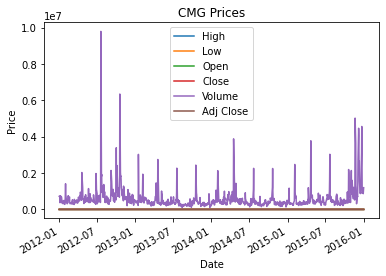

In [ ]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

Text(0.5, 0, 'Fecha')

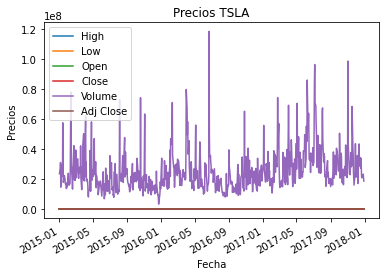

In [ ]:
precios.plot();
plt.title('Precios ' + simbolo)
plt.ylabel("Precios")
plt.xlabel("Fecha")

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [ ]:
print("Mean: ", prices.mean())
print("Standard deviation: ", prices.std())

Mean:  High            506.547406
Low             496.621740
Open            501.580328
Close           501.636650
Volume       591171.868787
Adj Close       501.636650
dtype: float64
Standard deviation:  High            147.589064
Low             145.792764
Open            146.831560
Close           146.688738
Volume       615931.535248
Adj Close       146.688738
dtype: float64


In [ ]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
              High          Low  ...        Volume    Adj Close
count  1006.000000  1006.000000  ...  1.006000e+03  1006.000000
mean    506.547406   496.621740  ...  5.911719e+05   501.636650
std     147.589064   145.792764  ...  6.159315e+05   146.688738
min     243.000000   233.820007  ...  1.012000e+05   236.240005
25%     374.037498   368.189995  ...  3.189750e+05   371.555000
50%     524.994995   515.934998  ...  4.262500e+05   521.270020
75%     651.910019   638.540024  ...  6.282000e+05   646.834991
max     758.609985   748.390015  ...  9.795100e+06   757.770020

[8 rows x 6 columns]


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

Calculamos la media aritmética o promedio de los precios y su desviación estándar, estas se calculan de la siguiente forma:

$\textbf{Promedio} = $ $\frac{1}{n} \sum_{i=1}^{n} Y_{i}$

$\textbf{Des. estándar} = $$\sqrt{\frac{\sum_{i=1}^{n} |Y_{i}-\bar{Y}|^2} {n}}$

Donde $Y$ Es el conjunto "precios", $n$ es la cantidad de datos y $\bar{Y}$ es el promedio de estos.

In [ ]:
print('Media: ', precios.mean())
print('Desviación estándar: ', precios.std())

Media:  High         5.100093e+01
Low          4.946642e+01
Open         5.026245e+01
Close        5.025842e+01
Volume       2.543451e+07
Adj Close    5.025842e+01
dtype: float64
Desviación estándar:  High         1.094213e+01
Low          1.074963e+01
Open         1.088271e+01
Close        1.085545e+01
Volume       1.356505e+07
Adj Close    1.085545e+01
dtype: float64


In [ ]:
print("Resumen de estadísticas")
print(precios.describe())

Resumen de estadísticas
             High         Low        Open       Close        Volume   Adj Close
count  755.000000  755.000000  755.000000  755.000000  7.550000e+02  755.000000
mean    51.000932   49.466421   50.262445   50.258424  2.543451e+07   50.258424
std     10.942132   10.749626   10.882713   10.855446  1.356505e+07   10.855446
min     30.993999   28.209999   28.464001   28.733999  3.540000e+06   28.733999
25%     42.615000   41.240999   41.880001   41.795000  1.682175e+07   41.795000
50%     47.551998   45.962002   46.995998   46.590000  2.214350e+07   46.590000
75%     58.639000   56.319000   56.721001   57.726000  3.006625e+07   57.726000
max     77.921997   75.870003   77.337997   77.000000  1.187120e+08   77.000000


We can easily modify `Series` with scalars using our basic mathematical operators.

In [ ]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03 00:00:00+00:00,690.979980,670.000000,677.400024,672.539978,1456190,672.539978
2012-01-04 00:00:00+00:00,689.960022,680.020020,682.000000,687.500000,1486190,687.500000
2012-01-05 00:00:00+00:00,693.960022,675.140015,683.760010,690.960022,1344590,690.960022
2012-01-06 00:00:00+00:00,695.260010,684.700012,687.760010,687.900024,741390,687.900024
2012-01-09 00:00:00+00:00,688.979980,662.580017,688.000000,669.479980,1497190,669.479980


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios_modificados = precios * 3
precios_modificados.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02 00:00:00+00:00,133.950005,127.956001,133.722004,131.585999,71466000,131.585999
2015-01-05 00:00:00+00:00,129.899998,124.295998,128.730000,126.054005,80527500,126.054005
2015-01-06 00:00:00+00:00,128.520000,122.525997,126.036003,126.768002,93928500,126.768002
2015-01-07 00:00:00+00:00,128.868004,125.868004,128.009995,126.569996,44526000,126.569996
2015-01-08 00:00:00+00:00,128.279995,126.005997,127.686001,126.372002,51637500,126.372002


And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [ ]:
noisy_prices = prices.High + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2012-01-03 00:00:00+00:00    351.460594
2012-01-04 00:00:00+00:00    391.831627
2012-01-05 00:00:00+00:00    403.282738
2012-01-06 00:00:00+00:00    374.998157
2012-01-09 00:00:00+00:00    432.228577
dtype: float64

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios_alterados= precios.High + 4* pd.Series(np.random.normal(0,5,len(precios)), index=precios.index) +10
precios_alterados.head()

Date
2015-01-02 00:00:00+00:00    60.032397
2015-01-05 00:00:00+00:00    36.467657
2015-01-06 00:00:00+00:00    88.541186
2015-01-07 00:00:00+00:00    46.224270
2015-01-08 00:00:00+00:00    60.023353
dtype: float64

If there are no matching indices, however, we may get an empty `Series` in return.

In [ ]:
empty_series = prices.High + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00+00:00   NaN
2012-01-04 00:00:00+00:00   NaN
2012-01-05 00:00:00+00:00   NaN
2012-01-06 00:00:00+00:00   NaN
2012-01-09 00:00:00+00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [ ]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

Text(0, 0.5, 'Percent Returns')

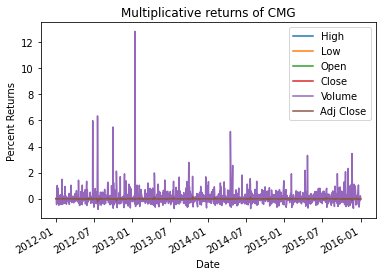

In [ ]:
mult_returns.plot();
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
sumar_retornos = precios.diff()[1:]
mult_retornos = precios.pct_change()[1:]

Text(0, 0.5, 'Retornos Porcentuales')

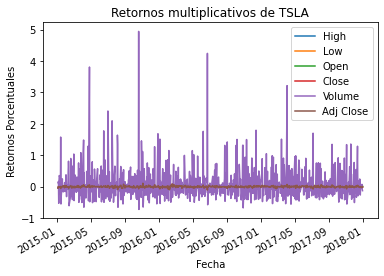

In [ ]:
mult_retornos.plot();
plt.title("Retornos multiplicativos de " + simbolo)
plt.xlabel("Fecha")
plt.ylabel("Retornos Porcentuales")

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [ ]:
rolling_mean = MAVG = prices.rolling(window=30,center=False).mean()
rolling_mean.name = "30-day rolling mean"

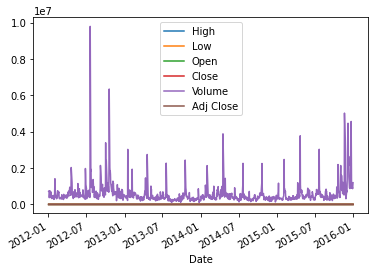

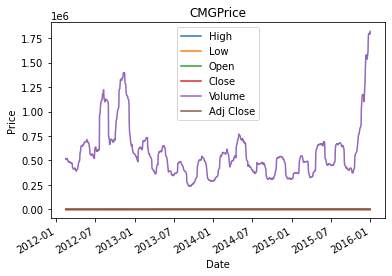

In [ ]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [ ]:
rolling_std = prices.rolling(window=30).std()
rolling_std.name = "30-day rolling volatility"

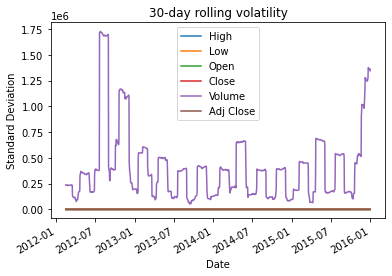

In [ ]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo TSLA
rolling_promedio = TSLA = precios.rolling(window=30,center=False).mean()
rolling_promedio.name = "30-day rolling mean"

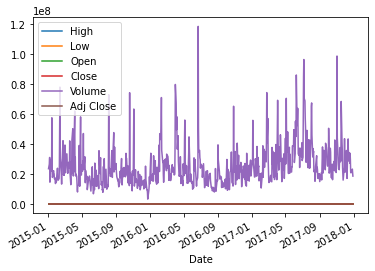

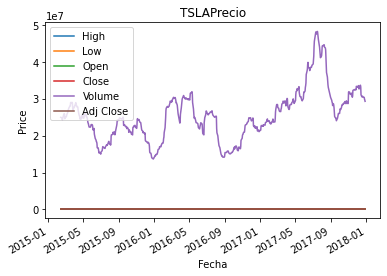

In [ ]:
# Ejemplo TSLA
precios.plot()
rolling_promedio.plot()
plt.title(simbolo + "Precio")
plt.xlabel("Fecha")
plt.ylabel("Price")
plt.legend();

In [ ]:
# Ejemplo TSLA
rolling_estandar = precios.rolling(window=30).std()
rolling_estandar.name = "Volatilidad 30 días"

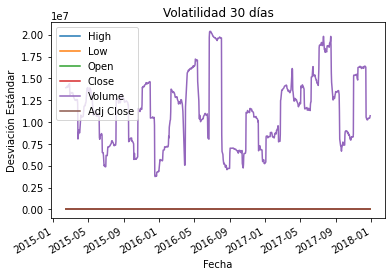

In [ ]:
# Ejemplo TSLA
rolling_estandar.plot()
plt.title(rolling_estandar.name);
plt.xlabel("Fecha")
plt.ylabel("Desviación Estándar");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [ ]:
print(np.median(mult_returns))

0.0005465394818680025


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
print(np.median(mult_retornos))

0.0004453702234106238


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [ ]:
print(mult_returns.median())

High         0.000051
Low          0.001460
Open         0.000879
Close        0.000236
Volume      -0.016473
Adj Close    0.000236
dtype: float64


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
print(mult_retornos.median())

High         0.000170
Low          0.001845
Open         0.000444
Close        0.000545
Volume      -0.030228
Adj Close    0.000545
dtype: float64


### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [ ]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print(dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-1.76040623, -0.45470237, -1.00255607, -0.21272658, -0.88023949])}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [ ]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print(frame_data)

            a  b         c
2016-01-01  1  L -1.760406
2016-01-02  2  K -0.454702
2016-01-03  3  J -1.002556
2016-01-04  4  M -0.212727
2016-01-05  5  Z -0.880239


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
datos_dict = {'acción aventura' : ['uncharted', 'tomb raider', 'red dead redemption', "assassin's creed"],
              'terror' : ['silent hill', 'rule of rose', 'siren', 'resident evil'],
              'shooter' : ['doom', 'quake', 'call of duty', 'destiny']}
print(datos_dict)

{'acción aventura': ['uncharted', 'tomb raider', 'red dead redemption', "assassin's creed"], 'terror': ['silent hill', 'rule of rose', 'siren', 'resident evil'], 'shooter': ['doom', 'quake', 'call of duty', 'destiny']}


In [ ]:
dato_df = pd.DataFrame(datos_dict, index=pd.date_range('2021-01-01', periods=4))
print(dato_df)

                acción aventura         terror       shooter
2021-01-01            uncharted    silent hill          doom
2021-01-02          tomb raider   rule of rose         quake
2021-01-03  red dead redemption          siren  call of duty
2021-01-04     assassin's creed  resident evil       destiny


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [ ]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
s_3 = pd.Series([0, 3, 6, 9, 12, 15], name='Múltiplos de 3')
s_4 = pd.Series([0, 4, 8, 12, 16, 20], name="Múltiplos de 4")
multiplos = pd.concat([s_3, s_4], axis=1)
print(multiplos)

   Múltiplos de 3  Múltiplos de 4
0               0               0
1               3               4
2               6               8
3               9              12
4              12              16
5              15              20


Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [ ]:
print(numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
print(multiplos.columns)

Index(['Múltiplos de 3', 'Múltiplos de 4'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [ ]:
numbers.columns = ['Shmevens', 'Shmodds']
print(numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In the same vein, the index of a `DataFrame` can be changed after the fact.

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
multiplos.columns = ['NO', 'SÍ']
print(multiplos)

   NO  SÍ
0   0   0
1   3   4
2   6   8
3   9  12
4  12  16
5  15  20


In [ ]:
print(numbers.index)

RangeIndex(start=0, stop=5, step=1)


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
print(multiplos.index)

RangeIndex(start=0, stop=6, step=1)


In [ ]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print(numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
multiplos.index = pd.Series(np.random.gamma(1,3,6))
print(multiplos)

          NO  SÍ
1.339266   0   0
0.728365   3   4
0.679052   6   8
0.752232   9  12
0.486792  12  16
1.446744  15  20


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [ ]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
multiplos.values

array([[ 0,  0],
       [ 3,  4],
       [ 6,  8],
       [ 9, 12],
       [12, 16],
       [15, 20]])

This returns a NumPy array.

In [ ]:
type(numbers.values)

numpy.ndarray

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
type(multiplos.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [ ]:
symbol = ["CMG", "MCD", "SHAK", "WFMIX"]
start_time = "2012-01-01"
end_time = "2016-01-01"
prices = pdtr.get_data_yahoo(symbol, start=start_time, end=end_time)
prices=prices['High']
#if isinstance(symbol, list):
#    prices.columns = map(lambda x: x.symbol, prices.columns)
#else:
#    prices.name = symbol

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
simbolo = ["MSFT", "TSLA", "AMZN", "GME"]
fecha_inicio = "2018-01-01"
fecha_final = "2021-03-01"
precios = pdtr.get_data_yahoo(simbolo, start=fecha_inicio, end=fecha_final)
precios = precios['High']

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [ ]:
prices.CMG.head()

Date
2012-01-03    350.489990
2012-01-04    349.980011
2012-01-05    351.980011
2012-01-06    352.630005
2012-01-09    349.489990
Name: CMG, dtype: float64

We can also use `loc[]` to access an individual column like so.

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios.GME.head()

Date
2018-01-02    18.290001
2018-01-03    18.370001
2018-01-04    18.379999
2018-01-05    18.730000
2018-01-08    19.400000
Name: GME, dtype: float64

In [ ]:
prices.loc[:, 'CMG'].head()

Date
2012-01-03    350.489990
2012-01-04    349.980011
2012-01-05    351.980011
2012-01-06    352.630005
2012-01-09    349.489990
Name: CMG, dtype: float64

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios.loc[:, 'GME'].head()

Date
2018-01-02    18.290001
2018-01-03    18.370001
2018-01-04    18.379999
2018-01-05    18.730000
2018-01-08    19.400000
Name: GME, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [ ]:
print(type(prices.CMG))
print(type(prices.loc[:, 'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
print(type(precios.GME))
print(type(precios.loc[:, 'GME']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [ ]:
prices.loc[:, ['CMG', 'MCD']].head()

Symbols,CMG,MCD
Date,,
2012-01-03,350.489990,101.589996
2012-01-04,349.980011,100.300003
2012-01-05,351.980011,100.400002
2012-01-06,352.630005,100.769997
2012-01-09,349.489990,100.930000


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios.loc[:, ['AMZN', 'MSFT']].head()

Symbols,AMZN,MSFT
Date,,
2018-01-02,1190.000000,86.309998
2018-01-03,1205.489990,86.510002
2018-01-04,1215.869995,87.660004
2018-01-05,1229.140015,88.410004
2018-01-08,1253.079956,88.580002


We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [ ]:
prices.loc['2015-12-15':'2015-12-22']

Symbols,CMG,MCD,SHAK,WFMIX
Date,,,,
2015-12-15,564.549988,118.239998,41.720001,30.23
2015-12-16,569.280029,118.750000,42.029999,30.25
2015-12-17,577.760010,118.900002,40.849998,29.76
2015-12-18,555.340027,117.279999,39.750000,29.40
2015-12-21,544.880005,117.739998,40.250000,29.52
2015-12-22,512.330017,118.040001,40.439999,29.92


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios.loc['2019-10-24':'2019-10-31']

Symbols,MSFT,TSLA,AMZN,GME
Date,,,,
2019-10-24,140.419998,60.986000,1788.339966,6.55
2019-10-25,141.139999,66.000000,1764.209961,6.43
2019-10-28,145.669998,68.167999,1778.699951,6.49
2019-10-29,144.500000,64.860001,1777.000000,6.25
2019-10-30,145.000000,63.757999,1782.380005,5.83
2019-10-31,144.929993,63.799999,1792.000000,5.69


This plays nicely with lists of columns, too.

In [ ]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

Symbols,CMG,MCD
Date,,
2015-12-15,564.549988,118.239998
2015-12-16,569.280029,118.750000
2015-12-17,577.760010,118.900002
2015-12-18,555.340027,117.279999
2015-12-21,544.880005,117.739998
2015-12-22,512.330017,118.040001


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios.loc['2019-10-24':'2019-10-31', ['AMZN', 'GME']]

Symbols,AMZN,GME
Date,,
2019-10-24,1788.339966,6.55
2019-10-25,1764.209961,6.43
2019-10-28,1778.699951,6.49
2019-10-29,1777.000000,6.25
2019-10-30,1782.380005,5.83
2019-10-31,1792.000000,5.69


Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [ ]:
prices.iloc[0:2, 1]

Date
2012-01-03    101.589996
2012-01-04    100.300003
Name: MCD, dtype: float64

In [ ]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

Symbols,CMG,WFMIX
Date,,
2012-01-04,349.980011,21.090000
2012-01-06,352.630005,21.250000
2012-01-10,344.339996,21.549999
2012-01-12,348.510010,21.660000
2012-01-17,357.750000,21.480000
2012-01-19,359.480011,21.920000
2012-01-23,363.320007,21.900000
2012-01-25,364.850006,22.160000
2012-01-27,368.359985,21.959999


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios.iloc[1:5, 2]

Date
2018-01-03    1205.489990
2018-01-04    1215.869995
2018-01-05    1229.140015
2018-01-08    1253.079956
Name: AMZN, dtype: float64

In [ ]:
# Ejemplo
precios.iloc[[2, 4, 6] + list(range(10, 50, 2)), [0, 1]].head(10)

Symbols,MSFT,TSLA
Date,,
2018-01-04,87.660004,63.709999
2018-01-08,88.580002,67.403999
2018-01-10,88.190002,67.400002
2018-01-17,90.279999,69.800003
2018-01-19,90.610001,70.117996
2018-01-23,92.300003,72.099998
2018-01-25,93.239998,69.839996
2018-01-29,95.449997,70.169998
2018-01-31,95.400002,71.237999


#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [ ]:
prices.loc[prices.MCD > prices.WFMIX].head()

Symbols,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,350.489990,101.589996,NaN,21.180000
2012-01-04,349.980011,100.300003,NaN,21.090000
2012-01-05,351.980011,100.400002,NaN,21.209999
2012-01-06,352.630005,100.769997,NaN,21.250000
2012-01-09,349.489990,100.930000,NaN,21.340000


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios.loc[precios.TSLA > precios.MSFT].head()

Symbols,MSFT,TSLA,AMZN,GME
Date,,,,
2020-02-04,180.639999,193.798004,2059.800049,4.25
2020-02-19,188.179993,188.955994,2185.100098,4.27
2020-06-08,188.550003,190.000000,2530.000000,5.14
2020-06-09,190.699997,190.888000,2626.429932,5.00
2020-06-10,198.520004,205.496002,2722.350098,5.53


We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [ ]:
prices.loc[(prices.MCD > prices.WFMIX) & ~prices.SHAK.isnull()].head()

Symbols,CMG,MCD,SHAK,WFMIX
Date,,,,
2015-01-30,716.979980,93.300003,52.497002,31.469999
2015-02-02,716.440002,92.660004,46.230000,31.870001
2015-02-03,726.630005,93.980003,45.250000,32.490002
2015-02-04,686.719971,94.430000,44.849998,32.410000
2015-02-05,679.989990,94.830002,42.880001,32.740002


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
precios.loc[(precios.TSLA > precios.MSFT) | (precios.GME*3.3 > precios.TSLA)].head()

Symbols,MSFT,TSLA,AMZN,GME
Date,,,,
2018-09-07,108.720001,53.669998,1975.199951,16.379999
2020-02-04,180.639999,193.798004,2059.800049,4.250000
2020-02-19,188.179993,188.955994,2185.100098,4.270000
2020-06-08,188.550003,190.000000,2530.000000,5.140000
2020-06-09,190.699997,190.888000,2626.429932,5.000000


#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [ ]:
symbol = "TSLA"
s_1 = pdtr.get_data_yahoo(symbol, start=start, end=end)
s_1 = s_1['Close']
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

Symbols,CMG,MCD,SHAK,WFMIX,TSLA
Date,,,,,
2012-01-03,350.489990,101.589996,NaN,21.180000,5.616
2012-01-04,349.980011,100.300003,NaN,21.090000,5.542
2012-01-05,351.980011,100.400002,NaN,21.209999,5.424
2012-01-06,352.630005,100.769997,NaN,21.250000,5.382
2012-01-09,349.489990,100.930000,NaN,21.340000,5.450


It is also just as easy to remove a column.

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
simbolo = "AAPL"
s_2 = pdtr.get_data_yahoo(simbolo, start=fecha_inicio,end=fecha_final)
s_2 = s_2['High']
precios.loc[:, 'AAPL'] = s_2
precios.head()

Symbols,MSFT,TSLA,AMZN,GME,AAPL
Date,,,,,
2018-01-02,86.309998,64.421997,1190.000000,18.290001,43.075001
2018-01-03,86.510002,65.050003,1205.489990,18.370001,43.637501
2018-01-04,87.660004,63.709999,1215.869995,18.379999,43.367500
2018-01-05,88.410004,63.448002,1229.140015,18.730000,43.842499
2018-01-08,88.580002,67.403999,1253.079956,19.400000,43.902500


In [ ]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

Symbols,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,350.489990,101.589996,NaN,21.180000
2012-01-04,349.980011,100.300003,NaN,21.090000
2012-01-05,351.980011,100.400002,NaN,21.209999
2012-01-06,352.630005,100.769997,NaN,21.250000
2012-01-09,349.489990,100.930000,NaN,21.340000


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios = precios.drop('AAPL', axis=1)
precios

Symbols,MSFT,TSLA,AMZN,GME
Date,,,,
2018-01-02,86.309998,64.421997,1190.000000,18.290001
2018-01-03,86.510002,65.050003,1205.489990,18.370001
2018-01-04,87.660004,63.709999,1215.869995,18.379999
2018-01-05,88.410004,63.448002,1229.140015,18.730000
2018-01-08,88.580002,67.403999,1253.079956,19.400000
...,...,...,...,...
2021-02-23,234.830002,713.609985,3204.729980,46.230000
2021-02-24,235.199997,745.000000,3171.229980,91.709999
2021-02-25,234.589996,737.210022,3178.260010,184.679993


If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [ ]:
df_1 = pdtr.get_data_yahoo(['SPY', 'VXX'], start=start, end=end)
df_1 = df_1['Close']
df_2 = pdtr.get_data_yahoo(['MSFT', 'AAPL', 'GOOG'], start=start, end=end)
df_2 = df_2['Close']
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'VXX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,SPY,VXX,MSFT,AAPL,GOOG
Date,,,,,
2012-01-03,127.500000,NaN,26.770000,14.686786,331.462585
2012-01-04,127.699997,NaN,27.400000,14.765714,332.892242
2012-01-05,128.039993,NaN,27.680000,14.929643,328.274536
2012-01-06,127.709999,NaN,28.110001,15.085714,323.796326
2012-01-09,128.020004,NaN,27.740000,15.061786,310.067780


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
df_4 = pdtr.get_data_yahoo(['AAPL', 'WMT', 'AMD'], start=start, end=end)
df_4 = df_4['Close']
df_5 = pdtr.get_data_yahoo(['INTC', 'NVDA', 'IBM'], start=start, end=end)
df_5 = df_5['Close']
df_6 = pd.concat([df_4, df_5], axis=1)
df_6.head()

Symbols,AAPL,WMT,AMD,INTC,NVDA,IBM
Date,,,,,,
2012-01-03,14.686786,60.330002,5.48,24.540001,14.04,186.300003
2012-01-04,14.765714,59.709999,5.46,25.110001,14.20,185.539993
2012-01-05,14.929643,59.419998,5.46,25.400000,14.71,184.660004
2012-01-06,15.085714,59.000000,5.43,25.250000,14.54,182.539993
2012-01-09,15.061786,59.180000,5.59,25.469999,14.54,181.589996


#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [ ]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

Symbols,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,350.489990,101.589996,0.0,21.180000
2012-01-04,349.980011,100.300003,0.0,21.090000
2012-01-05,351.980011,100.400002,0.0,21.209999
2012-01-06,352.630005,100.769997,0.0,21.250000
2012-01-09,349.489990,100.930000,0.0,21.340000


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios_relleno = precios.fillna(0)
precios_relleno.head()

Symbols,MSFT,TSLA,AMZN,GME
Date,,,,
2018-01-02,86.309998,64.421997,1190.000000,18.290001
2018-01-03,86.510002,65.050003,1205.489990,18.370001
2018-01-04,87.660004,63.709999,1215.869995,18.379999
2018-01-05,88.410004,63.448002,1229.140015,18.730000
2018-01-08,88.580002,67.403999,1253.079956,19.400000


In [ ]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

Symbols,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,350.489990,101.589996,52.497002,21.180000
2012-01-04,349.980011,100.300003,52.497002,21.090000
2012-01-05,351.980011,100.400002,52.497002,21.209999
2012-01-06,352.630005,100.769997,52.497002,21.250000
2012-01-09,349.489990,100.930000,52.497002,21.340000


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios_bfill = precios.fillna(method='bfill')
precios_bfill.head()

Symbols,MSFT,TSLA,AMZN,GME
Date,,,,
2018-01-02,86.309998,64.421997,1190.000000,18.290001
2018-01-03,86.510002,65.050003,1205.489990,18.370001
2018-01-04,87.660004,63.709999,1215.869995,18.379999
2018-01-05,88.410004,63.448002,1229.140015,18.730000
2018-01-08,88.580002,67.403999,1253.079956,19.400000


But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [ ]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

Symbols,CMG,MCD,SHAK,WFMIX
Date,,,,
2015-01-30,716.979980,93.300003,52.497002,31.469999
2015-02-02,716.440002,92.660004,46.230000,31.870001
2015-02-03,726.630005,93.980003,45.250000,32.490002
2015-02-04,686.719971,94.430000,44.849998,32.410000
2015-02-05,679.989990,94.830002,42.880001,32.740002


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
eliminar_precios = precios.dropna()
eliminar_precios.head()

Symbols,MSFT,TSLA,AMZN,GME
Date,,,,
2018-01-02,86.309998,64.421997,1190.000000,18.290001
2018-01-03,86.510002,65.050003,1205.489990,18.370001
2018-01-04,87.660004,63.709999,1215.869995,18.379999
2018-01-05,88.410004,63.448002,1229.140015,18.730000
2018-01-08,88.580002,67.403999,1253.079956,19.400000


#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

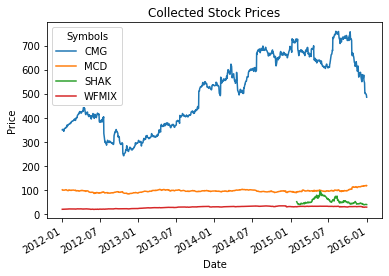

In [ ]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

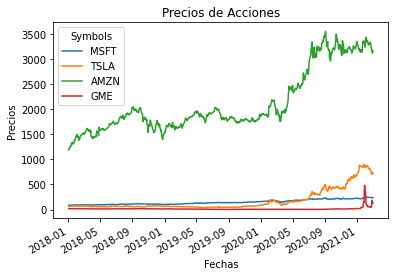

In [ ]:
# Ejemplo
precios.plot()
plt.title("Precios de Acciones")
plt.ylabel('Precios')
plt.xlabel('Fechas');

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [ ]:
prices.mean(axis=0)

Symbols
CMG      506.547406
MCD       97.175557
SHAK      55.302412
WFMIX     29.485646
dtype: float64

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios.mean(axis=0)

Symbols
MSFT     147.490855
TSLA     173.168262
AMZN    2121.362953
GME       14.607698
dtype: float64

As well as the standard deviation:

In [ ]:
prices.std(axis=0)

Symbols
CMG      147.589064
MCD        5.704697
SHAK      12.569332
WFMIX      4.464749
dtype: float64

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios.std(axis=0)

Symbols
MSFT     45.705892
TSLA    208.560603
AMZN    624.294078
GME      32.025846
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [ ]:
prices.describe()

Symbols,CMG,MCD,SHAK,WFMIX
count,1006.000000,1006.000000,233.000000,1006.000000
mean,506.547406,97.175557,55.302412,29.485646
std,147.589064,5.704697,12.569332,4.464749
min,243.000000,84.389999,39.750000,20.559999
25%,374.037498,94.152502,45.500000,25.045001
50%,524.994995,96.970001,50.500000,31.270000
75%,651.910019,99.627499,63.720001,33.040001
max,758.609985,120.230003,96.749001,35.689999


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
precios.describe()

Symbols,MSFT,TSLA,AMZN,GME
count,795.000000,795.000000,795.000000,795.000000
mean,147.490855,173.168262,2121.362953,14.607698
std,45.705892,208.560603,624.294078,32.025846
min,86.309998,37.335999,1190.000000,2.940000
25%,108.070000,58.357000,1708.990051,5.320000
50%,137.729996,68.961998,1858.880005,11.240000
75%,185.895004,167.829002,2439.670044,15.100000
max,246.130005,900.400024,3552.250000,483.000000


We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [ ]:
(2 * prices - 50).head(5)

Symbols,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-03,650.979980,153.179993,NaN,-7.639999
2012-01-04,649.960022,150.600006,NaN,-7.820000
2012-01-05,653.960022,150.800003,NaN,-7.580002
2012-01-06,655.260010,151.539993,NaN,-7.500000
2012-01-09,648.979980,151.860001,NaN,-7.320000


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
(0.75 * (precios / 10)).head()

Symbols,MSFT,TSLA,AMZN,GME
Date,,,,
2018-01-02,6.47325,4.83165,89.250000,1.37175
2018-01-03,6.48825,4.87875,90.411749,1.37775
2018-01-04,6.57450,4.77825,91.190250,1.37850
2018-01-05,6.63075,4.75860,92.185501,1.40475
2018-01-08,6.64350,5.05530,93.980997,1.45500


Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [ ]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

Symbols,CMG,MCD,SHAK,WFMIX
Date,,,,
2012-01-04,-0.001455,-0.012698,NaN,-0.004249
2012-01-05,0.005715,0.000997,NaN,0.005690
2012-01-06,0.001847,0.003685,NaN,0.001886
2012-01-09,-0.008905,0.001588,NaN,0.004235
2012-01-10,-0.014736,-0.004756,NaN,0.009841


$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
mult_retornos = precios.pct_change()[100:]
mult_retornos.head()

Symbols,MSFT,TSLA,AMZN,GME
Date,,,,
2018-05-25,0.000404,-0.005229,0.003656,0.001565
2018-05-29,-0.001010,0.024532,0.004752,0.024219
2018-05-30,0.003742,0.029703,0.002596,0.037376
2018-05-31,0.007456,-0.015728,0.005535,-0.000735
2018-06-01,0.008701,0.005441,0.007174,0.009566


If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

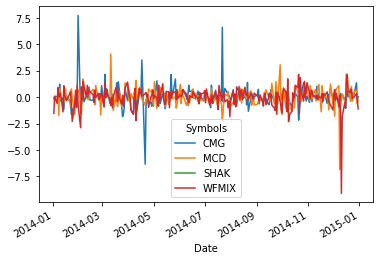

In [ ]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

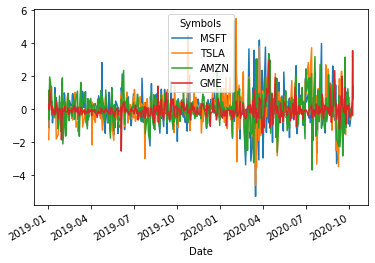

In [ ]:
# Ejemplo
norm_retornos = (mult_retornos-mult_retornos.mean(axis=0))/mult_retornos.std(axis=0)
norm_retornos.loc['2019-01-01':'2020-10-10'].plot();

Rolling means and standard deviations also work with `DataFrames`.

In [ ]:
rolling_mean = prices.rolling(window=30, center=False).mean()
rolling_mean.columns = prices.columns

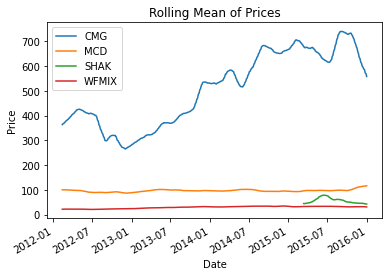

In [ ]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

$\textbf{Ejemplo Santiago Diaz Gonzalez:}$

In [ ]:
# Ejemplo
rolling_promedio = precios.rolling(window=50, center=False).mean()
rolling_promedio.columns = precios.columns

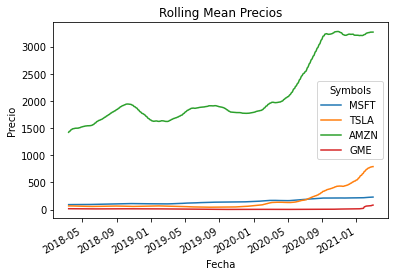

In [ ]:
# Ejemplo
rolling_promedio.plot()
plt.title("Rolling Mean Precios")
plt.xlabel('Fecha')
plt.ylabel("Precio")
plt.legend;

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*